In [ ]:
import pandas as pd

df = pd.read_csv("yelp.csv")
df = df.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)

In [ ]:
# for idx,row in df.iterrows():
#   print('UNK:UNK'+ ' ' + row['text'])
count = 0
with open("unlabeled_1.tsv", "w") as record_file:
    record_file.write("%s %s\n" % ('fine_label', 'utterance'))
    for idx,row in df.iterrows():
      if len(row['text']) <400:
        count = count+1
        record_file.write("%s %s\n" % ('UNK:UNK', row['text']))

    print(count)

3633


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
labelled = pd.read_csv("deceptive-opinion.csv")

df_train, df_test = train_test_split(
    labelled, test_size=0.30, random_state=42)

In [ ]:
count = 0
with open("labeled_1.tsv", "w") as record_file:
    record_file.write("%s %s\n" % ('fine_label', 'utterance'))
    for idx,row in df_train.iterrows():
        count = count+1
        record_file.write("%s:%s %s" % (row['deceptive'],row['deceptive'], row['text']))

    print(count)

1120


In [ ]:
count = 0
with open("test_1.tsv", "w") as record_file:
    record_file.write("%s %s\n" % ('fine_label', 'utterance'))
    for idx,row in df_test.iterrows():
        count = count+1
        record_file.write("%s:%s %s" % (row['deceptive'],row['deceptive'], row['text']))

    print(count)

480


In [ ]:
tsv = pd.read_csv('labeled_1.tsv',sep="\t")

In [ ]:
tsv

,fine_label utterance
0,deceptive:deceptive when i first checked the h...
1,deceptive:deceptive I had really high hopes fo...
2,deceptive:deceptive Hotel Monaco is simply ama...
3,truthful:truthful My experiences at the Fairmo...
4,truthful:truthful I have traveled to Chicago m...
...,...
1115,truthful:truthful Stayed at the Amalfi hotel i...
1116,deceptive:deceptive My husband and I were sore...
1117,truthful:truthful We experienced bed bugs in o...
1118,deceptive:deceptive I had a business trip comi...


In [ ]:
tsv1 = pd.read_csv('labeled_1.tsv',sep="\t")
tsv1

,fine_label utterance
0,deceptive:deceptive when i first checked the h...
1,deceptive:deceptive I had really high hopes fo...
2,deceptive:deceptive Hotel Monaco is simply ama...
3,truthful:truthful My experiences at the Fairmo...
4,truthful:truthful I have traveled to Chicago m...
...,...
1115,truthful:truthful Stayed at the Amalfi hotel i...
1116,deceptive:deceptive My husband and I were sore...
1117,truthful:truthful We experienced bed bugs in o...
1118,deceptive:deceptive I had a business trip comi...


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
labelled = pd.read_csv("deceptive-opinion.csv")

df_train, df_test = train_test_split(
    labelled, test_size=0.30, random_state=42)

In [ ]:
count = 0
with open("labeled_2.tsv", "w") as record_file:
    record_file.write("%s %s\n" % ('fine_label', 'utterance'))
    for idx,row in df_train.iterrows():
        count = count+1
        record_file.write("%s:%s %s" % (row['deceptive'],row['polarity'], row['text']))

    print(count)

1120


In [ ]:
count = 0
with open("test_2.tsv", "w") as record_file:
    record_file.write("%s %s\n" % ('fine_label', 'utterance'))
    for idx,row in df_test.iterrows():
        count = count+1
        record_file.write("%s:%s %s" % (row['deceptive'],row['polarity'], row['text']))

    print(count)

480


# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("deceptive-opinion.csv")
data.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


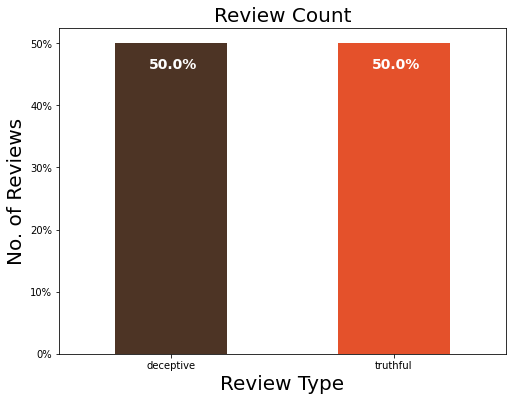

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

colors = ['#4D3425','#E4512B']
ax = (data['deceptive'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('No. of Reviews',size = 20)
ax.set_xlabel('Review Type',size = 20)
ax.set_title('Review Count', size = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)


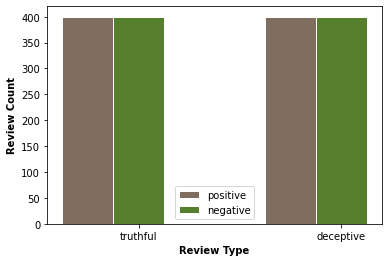

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
df = data
df1 = df[(df.deceptive == "truthful") & (df.polarity == "positive")]
df2 = df[(df.deceptive == "deceptive") & (df.polarity == "positive")]
df3 = df[(df.deceptive == "truthful") & (df.polarity == "negative")]
df4 = df[(df.deceptive == "deceptive") & (df.polarity == "negative")]
# set heights of bars
bars1 = [len(df1), len(df2)]
bars2 = [len(df3), len(df4)]

 
# Set position of bar on X axis#
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='positive')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='negative')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('Review Type', fontweight='bold')
plt.ylabel('Review Count', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['truthful', 'deceptive'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
data.drop(["hotel","source"], axis=1,inplace=True)
data.head()

,deceptive,polarity,text
0,truthful,positive,We stayed for a one night getaway with family ...
1,truthful,positive,Triple A rate with upgrade to view room was le...
2,truthful,positive,This comes a little late as I'm finally catchi...
3,truthful,positive,The Omni Chicago really delivers on all fronts...
4,truthful,positive,I asked for a high floor away from the elevato...


In [ ]:
data.describe()

,deceptive,polarity,text
count,1600,1600,1600
unique,2,2,1596
top,deceptive,positive,The Omni was chosen for it's location whichwor...
freq,800,800,2


In [ ]:
data.groupby('deceptive').describe()

polarity  ... text
             count  ... freq
deceptive           ...     
deceptive      800  ...    1
truthful       800  ...    2

[2 rows x 8 columns]

In [ ]:
data.groupby('polarity').describe()

deceptive  ... text
             count  ... freq
polarity            ...     
negative       800  ...    2
positive       800  ...    1

[2 rows x 8 columns]

In [ ]:
data['length'] = data['text'].apply(len)
data.head()

,deceptive,polarity,text,length
0,truthful,positive,We stayed for a one night getaway with family ...,572
1,truthful,positive,Triple A rate with upgrade to view room was le...,286
2,truthful,positive,This comes a little late as I'm finally catchi...,1104
3,truthful,positive,The Omni Chicago really delivers on all fronts...,707
4,truthful,positive,I asked for a high floor away from the elevato...,384


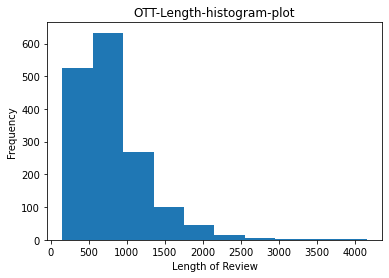

In [ ]:
  import matplotlib.pyplot as pl
  import numpy as np

  a = np.array(data['length'])
  fig = pl.hist(a)
  pl.title('OTT-Length-histogram-plot')
  pl.xlabel("Length of Review")
  pl.ylabel("Frequency")
  pl.savefig("OTT-Length-histogram-plot.png")

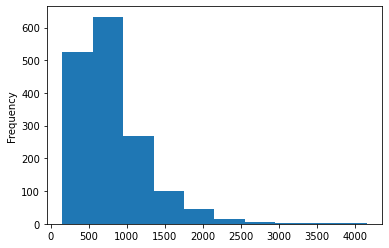

In [ ]:
data['length'].plot(bins=10, kind='hist') 

In [ ]:
data.length.describe()

count    1600.000000
mean      806.391250
std       467.260647
min       151.000000
25%       487.000000
50%       700.000000
75%       987.500000
max      4159.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27add64710>,
      dtype=object)

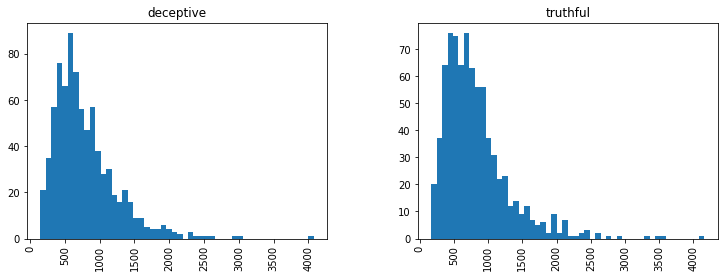

In [ ]:
data.hist(column='length', by='deceptive', bins=50,figsize=(12,4))

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline


In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["room","stay","hotel","service","r oom","staff","bathroom","front desk","front  desk","night"])

In [ ]:
# Word Cloud for Deceptive review

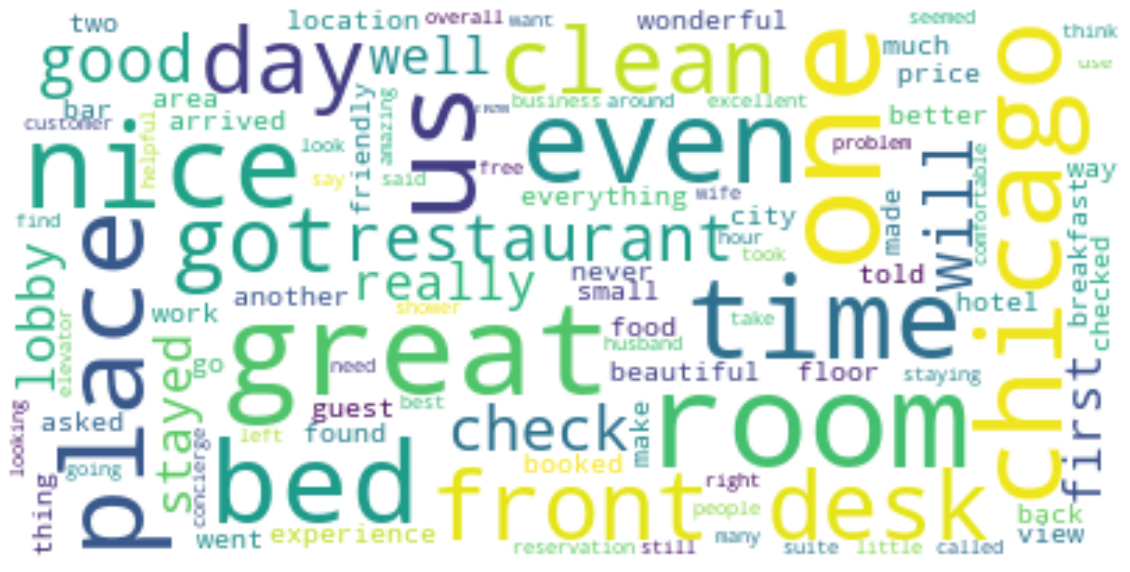

In [ ]:
df = pd.read_csv("deceptive-opinion.csv")
deceptive = df[(df.deceptive == "deceptive") & (df.polarity == "positive")]
df['text']= df['text'].str.lower()


all_deceptive = df['text'].str.split(' ')


all_spam_cleaned = []

for text in all_deceptive:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)



wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)
#wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.savefig('dp.png', bbox_inches='tight')
plt.axis("off")
plt.show()

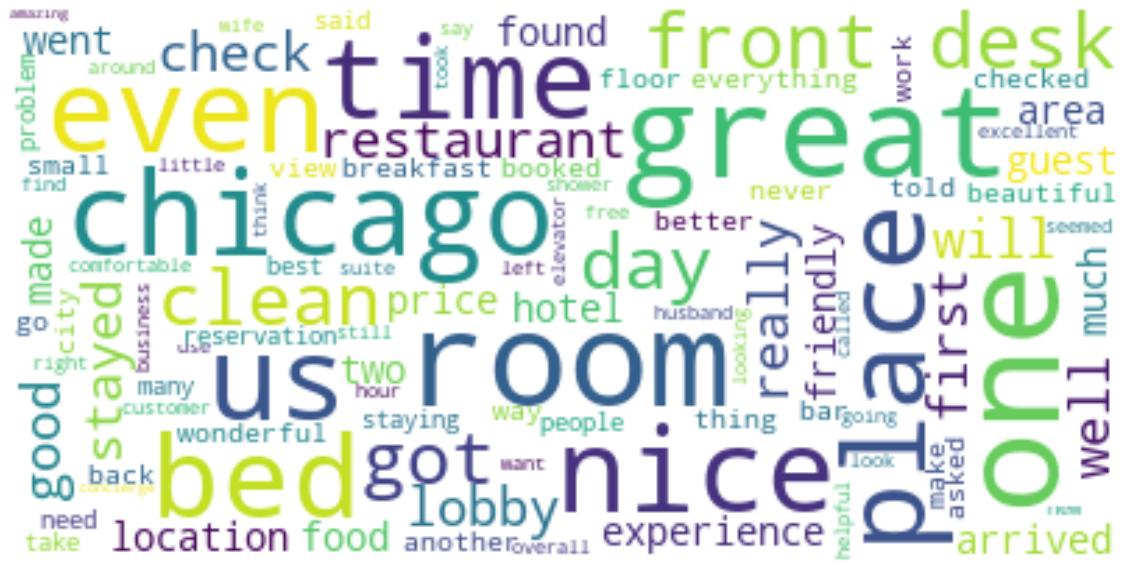

In [ ]:
df = pd.read_csv("deceptive-opinion.csv")
deceptive = df[(df.deceptive == "truthful") & (df.polarity == "positive")]
df['text']= df['text'].str.lower()


all_deceptive = df['text'].str.split(' ')


all_spam_cleaned = []

for text in all_deceptive:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)


wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)
#wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.savefig('tp.png', bbox_inches='tight')
plt.axis("off")
plt.show()

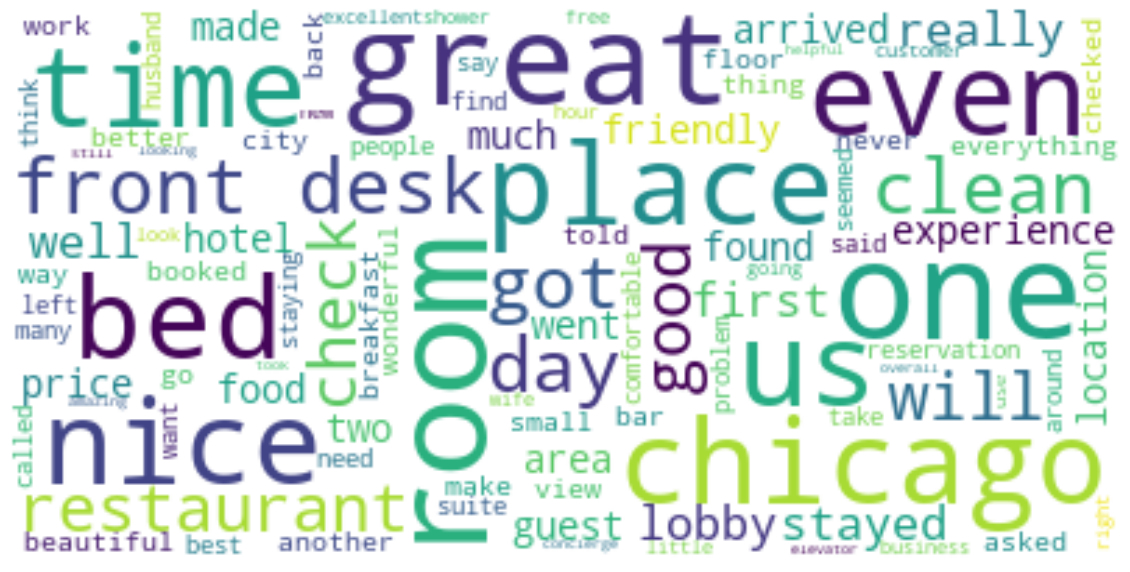

In [ ]:
df = pd.read_csv("deceptive-opinion.csv")
deceptive = df[(df.deceptive == "deceptive") & (df.polarity == "negative")]
df['text']= df['text'].str.lower()


all_deceptive = df['text'].str.split(' ')


all_spam_cleaned = []

for text in all_deceptive:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)
#wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.savefig('dn.png', bbox_inches='tight')
plt.axis("off")
plt.show()

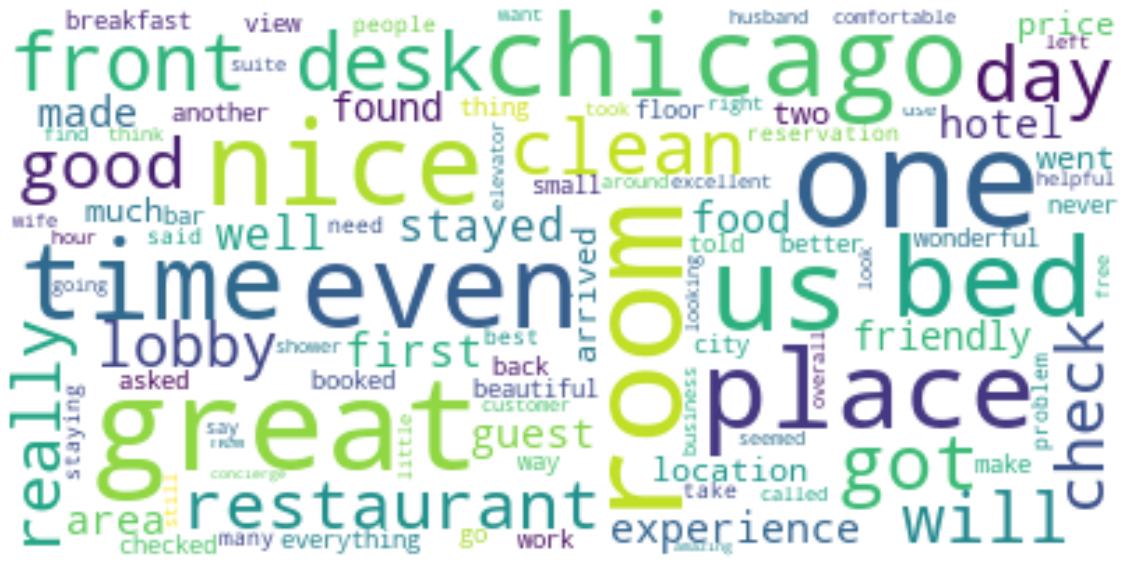

In [ ]:
df = pd.read_csv("deceptive-opinion.csv")
deceptive = df[(df.deceptive == "truthful") & (df.polarity == "negative")]
df['text']= df['text'].str.lower()


all_deceptive = df['text'].str.split(' ')


all_spam_cleaned = []

for text in all_deceptive:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)
#wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.savefig('tn.png', bbox_inches='tight')
plt.axis("off")
plt.show()

In [2]:
import pandas as pd

data = pd.read_csv("yelp.csv")
data = data.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)


data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [3]:

data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [6]:
data['length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

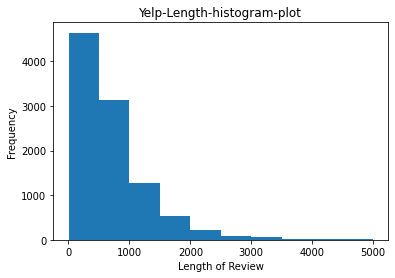

In [4]:
import matplotlib.pyplot as pl
import numpy as np

a = np.array(data['length'])
fig = pl.hist(a)
pl.title('Yelp-Length-histogram-plot')
pl.xlabel("Length of Review")
pl.ylabel("Frequency")
pl.savefig("Yelp-Length-histogram-plot.png")


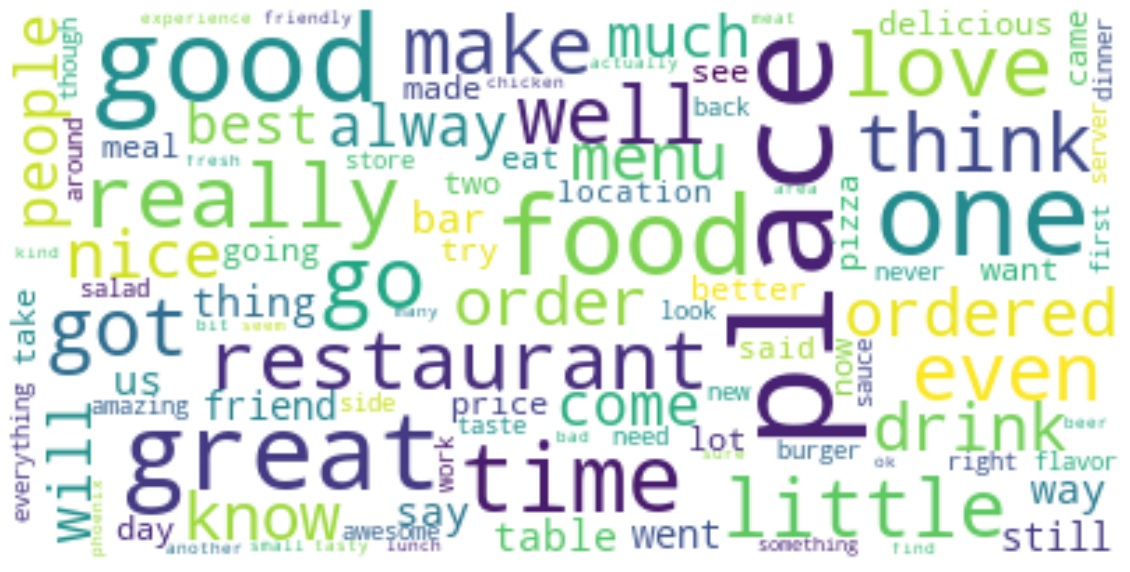

In [5]:

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt
% matplotlib inline


stopwords = set(STOPWORDS)
stopwords.update(["room","stay","hotel","service","r oom","staff","bathroom","front desk","front  desk","night"])

df = data
df['text']= df['text'].str.lower()


all_deceptive = df['text'].str.split(' ')


all_spam_cleaned = []

for text in all_deceptive:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)



wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_spam)
#wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

# Lines 2 - 5
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.savefig('dp.png', bbox_inches='tight')
plt.axis("off")
plt.show()